In [7]:
from fuzzywuzzy import fuzz
import numpy as np
import matplotlib
#matplotlib.style.use('seaborn')
import matplotlib.pyplot as plt
%matplotlib inline  

HOME_DIR = '/home/adam/Nextcloud/Cloud2/critical_juncture/notebooks/fed_reg/fr-archive/'

import glob, os
os.chdir(HOME_DIR)
fileList = sorted(glob.glob('*.txt'), key=lambda name: int(name[:-4]))

search_str = 'BILLING CODE'

In [16]:
test_str = 'BHXtMQ CODE'

fuzz.partial_ratio(search_str,test_str)

45

In [9]:
def str_search(page_slice):
    part_ratios = []
    exact_matches = []
    page_chars = []

    for tf_name in fileList[page_slice]:
        cur_text = open(tf_name, 'r').read()
        page_len = len(cur_text)-len(search_str)
        page_chars.append(page_len)
        for i in range(page_len):
            str_snip = cur_text[i:i+len(search_str)]
            ex_match_score = str_snip==search_str
            exact_matches.append(ex_match_score)
            fuzz_match_score = fuzz.partial_ratio(str_snip,search_str)
            part_ratios.append(fuzz_match_score)

    # Scale exact-matches to same range as partial matches
    exact_matches_scl = [int(elem)*max(part_ratios) for elem in exact_matches]
    page_ends = [0]*len(exact_matches_scl)

    # Mark the ending of each page
    page_chars_ends = reduce(lambda c, x: c + [c[-1] + x], page_chars, [0])[1:-1]
    for i in page_chars_ends: page_ends[i] = max(part_ratios)

    plt.plot(exact_matches_scl,'--g', linewidth=3.5)
    plt.plot(part_ratios)
    plt.plot(page_ends,'k')
    plt.xlabel('char. #')
    plt.ylabel('normalized match score')
    plt.title("'BILLING CODE' search")
    plt.show()
    plt.savefig('BILLING_CODEsearch.png', bbox_inches='tight')

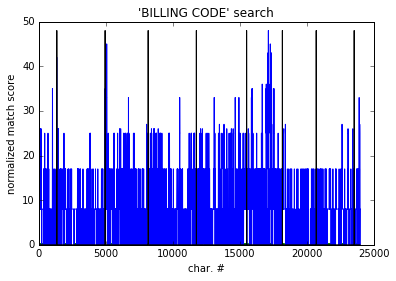

In [11]:
str_search(slice(0,10))

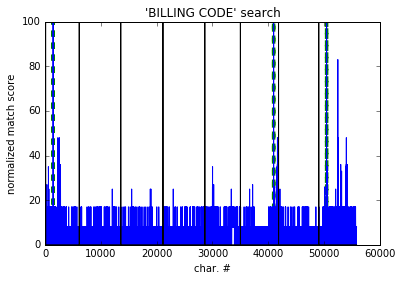

In [12]:
str_search(slice(11,20))

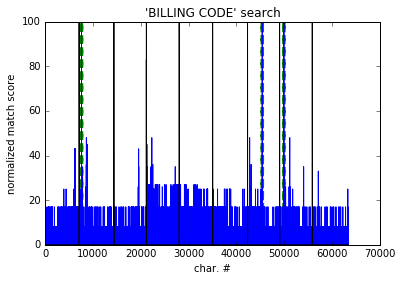

In [13]:
str_search(slice(21,30))

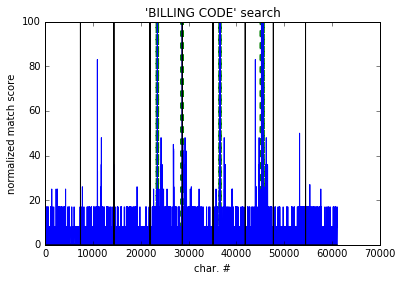

In [14]:
str_search(slice(31,40))